# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [118]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Launch an empty chrome browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
raw_rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
raw_rows[0]

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>

In [7]:
raw_rows[1]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

In [8]:
# Get the column headers and store them in a list
header_row = table.find("tr")
headers = [header.get_text(strip=True) for header in header_row.find_all("th")]
for header in headers:
    print(header)

id
terrestrial_date
sol
ls
month
min_temp
pressure


In [9]:
# Iterate over the table rows and store them in a list
rows = []
for row in table.find_all("tr"):
    # Get the text content of each cell in the row and store it as a list
    cells = [cell.get_text(strip=True) for cell in row.find_all("td")]
    rows.append(cells)
    
# Print the first 20 of the list of rows and the list length
for row in rows[0:20]:
    print(row)
print(f"\nThere are {len(rows)-1} rows in the table (excluding the empty header row).")

[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows[1:], columns=headers)
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis and confirm type changes
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')
mars_df[['sol', 'ls', 'month']] = mars_df[['sol', 'ls', 'month']].astype('int64')
mars_df[['min_temp', 'pressure']] = mars_df[['min_temp', 'pressure']].astype('float64')
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
mars_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


## Background Research

### 1. "In the context of the solar system and other planets, a month is typically defined as the time it takes for a specific celestial body (planet or moon) to complete one orbit around its parent body (such as a planet orbiting the Sun or a moon orbiting a planet)."

### 2. "The way that scientists mark the time of Mars year is to use solar longitude, abbreviated Ls (read "ell sub ess"). Ls is 0° at the vernal equinox (beginning of northern spring), 90° at summer solstice, 180° at autumnal equinox, and 270° at winter solstice."

### 3. "The term sol is used by planetary astronomers to refer to the duration of a solar day on Mars. A mean Martian solar day, or "sol", is 24 hours, 39 minutes, and 35.244 seconds. “Sol” is often used as a direct replacement for “Day” when concerning Mars."

In [15]:
vernal_equinox = mars_df[mars_df.ls == 0]
vernal_equinox

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


### Discussion: 3 vernal equinoxes were observed during the data collection period of this dataset: one in terrestrial August 1st, 2013, one June 19th, 2015, and one May 6th, 2017. 

In [24]:
ve_1_date = vernal_equinox.iloc[0,:].terrestrial_date
ve_2_date = vernal_equinox.iloc[2,:].terrestrial_date

In [25]:
mars_yr_terr_days = (ve_2_date - ve_1_date).days
mars_yr_terr_days

687

### Discussion: There is a vernal equinox every 687 terrestrial days on Mars.

In [105]:
print(f"The time interval in terrestrial days between vernal equinoxes on Mars is {mars_yr_terr_days}, which means that a year on Mars is {round(100*(mars_yr_terr_days/365),2)}% the length of an Earth year.")

The time interval in terrestrial days between vernal equinoxes on Mars is 687, which means that a year on Mars is 188.22% the length of an Earth year.


## 1. How many months are there on Mars?

In [27]:
mars_df.sol.describe()

count    1867.000000
mean     1015.670059
std       565.342298
min        10.000000
25%       546.500000
50%      1028.000000
75%      1505.500000
max      1977.000000
Name: sol, dtype: float64

In [28]:
mars_df.month.describe()

count    1867.000000
mean        6.141939
std         3.506493
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64

In [33]:
month_gb = mars_df.groupby('month')['sol'].count()
month_gb

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [34]:
# Find the average Martian month length in days
month_gb.mean()

155.58333333333334

### Answer to Question 1: According to this dataset, using ['month'] for month, there are 12 months on Mars with an average Martian day length of 155.58 days.

## 2. How many Martian days' worth of data are there?

In [64]:
n_days = mars_df.mars_df.sol.nunique()
print(f"There are {n_days} Martian days' worth of data in the table.")

There are 1867 Martian days' worth of data in the table.


## 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [69]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                        'July', 'August', 'September', 'October', 'November', 'December']

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
dtype: object

In [98]:
temp_df = mars_df.groupby('month', as_index=False)['min_temp'].mean().round(2)
temp_df['month_name'] = month_names
temp_df

,month,min_temp,month_name
0,1,-77.16,January
1,2,-79.93,February
2,3,-83.31,March
3,4,-82.75,April
4,5,-79.31,May
5,6,-75.30,June
6,7,-72.28,July
7,8,-68.38,August
8,9,-69.17,September
9,10,-71.98,October


In [99]:
coldest_month = temp_df[temp_df.min_temp == temp_df.min_temp.min()].month_name.values[0]
coldest_month

'March'

In [100]:
warmest_month = temp_df[temp_df.min_temp == temp_df.min_temp.max()].month_name.values[0]
warmest_month

'August'

In [101]:
print(f"According to this dataset, the coldest month on Mars is {coldest_month} and the warmest month is {warmest_month}.")

According to this dataset, the coldest month on Mars is March and the warmest month is August.


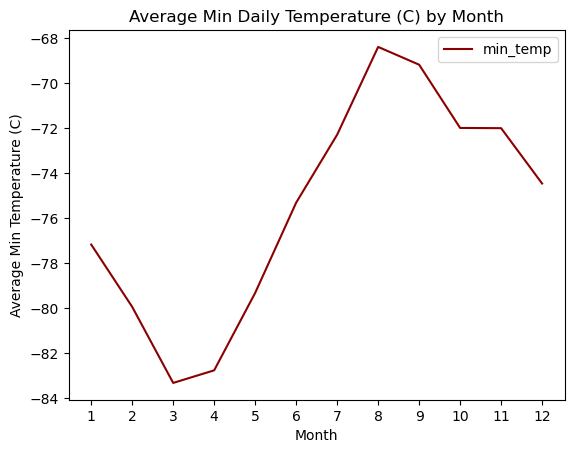

In [104]:
# Plot the average min temperature by month
temp_df.plot(x='month', y='min_temp', color='darkred')
plt.title("Average Min Daily Temperature (C) by Month")
plt.xlabel("Month")
plt.ylabel("Average Min Temperature (C)")
plt.xticks(np.arange(1, len(min_temp_by_month) + 1))
plt.savefig('Figures/avg_min_daily_temp_by_month.png')
plt.show()

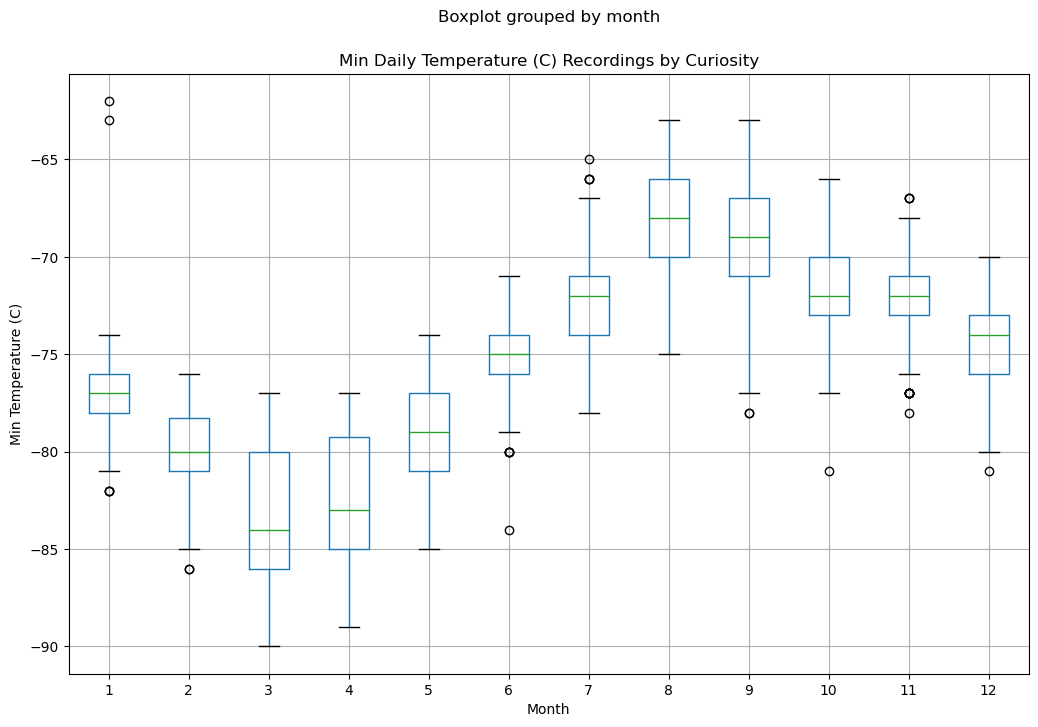

In [106]:
# Use a boxplot to better visualize monthly temperature recordings by Curiosity on Mars
mars_df.boxplot(column='min_temp', by='month', figsize=[12,8])
plt.title("Min Daily Temperature (C) Recordings by Curiosity")
plt.xlabel("Month")
plt.ylabel("Min Temperature (C)")
plt.savefig('Figures/min_daily_temperature_by_month_boxplot.png')
plt.show()

## 4. Which months have the lowest and the highest atmospheric pressure on Mars?

In [113]:
avg_pressure_by_month = mars_df.groupby('month', as_index=False)['pressure'].mean().round(0)
avg_pressure_by_month['pressure'] = avg_pressure_by_month['pressure'].astype('int64')
avg_pressure_by_month['month_name'] = month_names
press_df = avg_pressure_by_month
press_df

,month,pressure,month_name
0,1,862,January
1,2,889,February
2,3,877,March
3,4,806,April
4,5,749,May
5,6,745,June
6,7,795,July
7,8,874,August
8,9,913,September
9,10,887,October


In [115]:
lowest_pressure_month = press_df[press_df.pressure == press_df.pressure.min()].month_name.values[0]
highest_pressure_month = press_df[press_df.pressure == press_df.pressure.max()].month_name.values[0]

In [116]:
print(f"The month with the lowest observed average pressure is {lowest_pressure_month} and the month with the highest is {highest_pressure_month}.") 

The month with the lowest observed average pressure is June and the month with the highest is September.


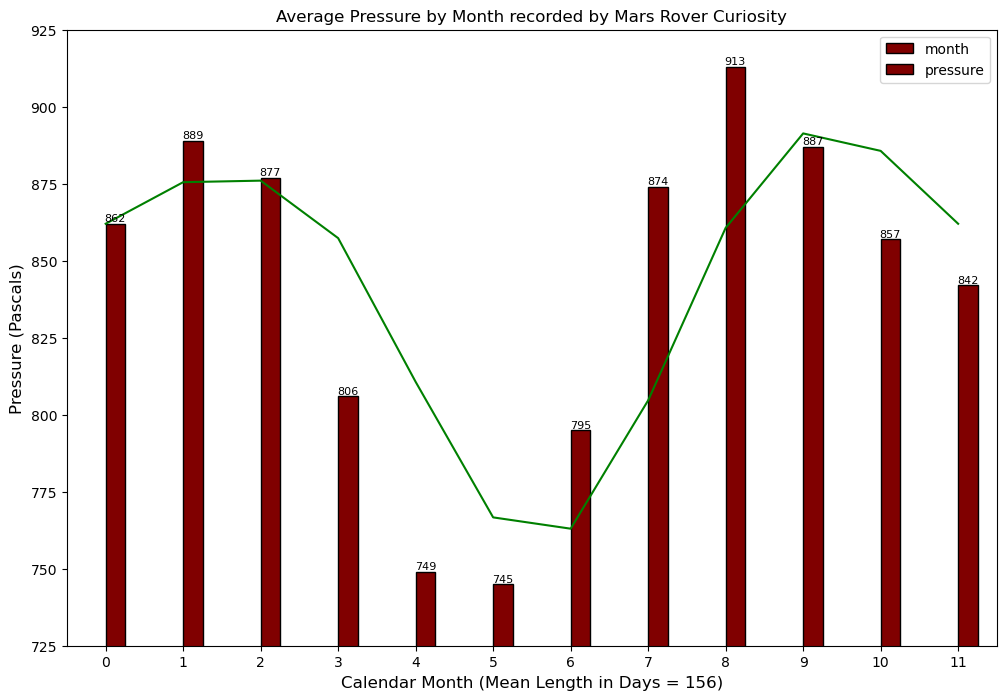

In [119]:
# Plot the average pressure by month
ax = avg_pressure_by_month.plot.bar(color='maroon', edgecolor='black', figsize=[12,8])

# Add values above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

# Add a smooth trend line
smooth_data = avg_pressure_by_month.rolling(window=3, min_periods=1).mean()  
ax.plot(smooth_data.index, smooth_data, color='green')

# Set the y-axis limits
ax.set_ylim(725, 925)

# Add a title and axis labels to the plot
ax.set_title('Average Pressure by Month recorded by Mars Rover Curiosity',size=12)
ax.set_ylabel('Pressure (Pascals)',size=12)
ax.set_xlabel('Calendar Month (Mean Length in Days = 156)',size=12)

# Rotate the x ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Displaying the plot
plt.savefig('Figures/avg_monthly_pressure_barplot.png')
plt.show()

## 5. About how many terrestrial (Earth) days exist in a Martian year?

## As was discovered in this analysis, approximately 687 Earth days exist in a Martian year.

In [121]:
print(mars_yr_terr_days)

687


## 6. Save the Data

Export the DataFrame to a CSV file.

In [80]:
# Write the data to a CSV
mars_df.to_csv('Data/mars_temperature_data.csv', index=False)

In [122]:
browser.quit()